In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

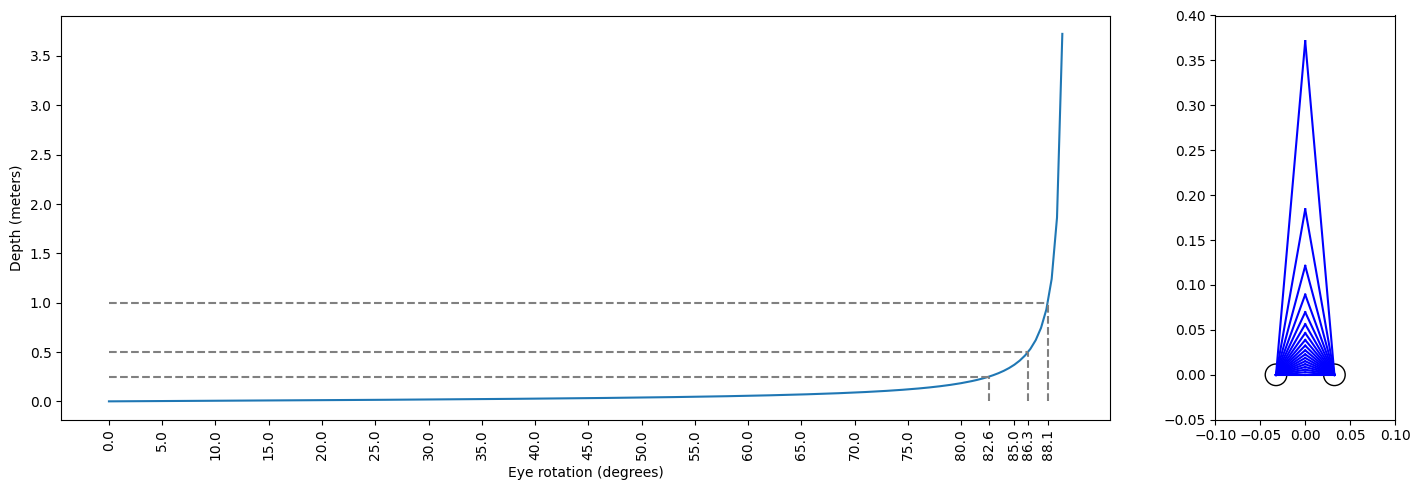

In [96]:
IPD = 0.065  # Interpupillary Distance
EYE_SIZE = 0.024  # Eyeball size

def inv(depth):
    return math.degrees(math.atan2(depth, IPD / 2))

def plot_angle_to_depth(angle0, angle1, step, extra_lines, ax):
    angles_deg = np.arange(angle0, angle1, step)
    angles_rad = angles_deg * math.pi / 180
    ax.plot(angles_deg, np.tan(angles_rad) * IPD / 2)
    
    extraticks = []
    for y in extra_lines:
        x = inv(y)
        ax.plot((0, x), (y, y), '--', color='gray')
        ax.plot((x, x), (0, y), '--', color='gray')
        extraticks.append(x)
    ax.set_xlabel("Eye rotation (degrees)")
    ax.set_ylabel("Depth (meters)")
    x_ticks = sorted(list(np.arange(angle0, angle1, 5)) + extraticks)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f'{t:.1f}' for t in x_ticks], rotation = 90)

def plot_circle(center, radius, ax):
    Drawing_uncolored_circle = plt.Circle(center, radius, fill = False)
 
    ax.set_aspect(1)
    ax.add_artist(Drawing_uncolored_circle)

def plot_eyes(center, ax):
    cx, cy = center
    eye_centers = [(cx - IPD / 2, cy), (cx + IPD / 2, cy)]
    for eye_center in eye_centers:
        plot_circle(eye_center, EYE_SIZE / 2, ax)
    ax.set_xlim(-0.1, 0.1)
    return eye_centers

def plot_gaze(eye_centers, angle0, angle1, step, ax):
    angles_deg = np.arange(angle0, angle1, step)
    angles_rad = angles_deg * math.pi / 180
    depths = np.tan(angles_rad) * IPD / 2

    for depth in depths:
        for eye in eye_centers:
            ax.plot(eye, (0, depth), color='blue')

    ax.set_ylim(-0.05, 0.4)


fig, axes = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 1]})
plot_angle_to_depth(0, 90, 0.5, [0.25, 0.5, 1], axes[0])
eye_centers = plot_eyes((0, 0), axes[1])
plot_gaze(eye_centers, 0, 90, 5, axes[1])
plt.tight_layout()
print()